## Prepare Data

In [300]:
import torch
import os
import torchaudio

print(torch.__version__)
print(torchaudio.__version__)

torch.random.manual_seed(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)

bundle = torchaudio.pipelines.HUBERT_LARGE
model_extr = bundle.get_model().to(device)

main_path = '/home/wawa_/'

emotion_map = {'Neutre': 'neutral', 'Colère': 'angry', 'Joie': 'happy', 'Tristesse': 'sad', 'Peur': 'fear',
              'Dégoût': 'disgust', 'Surprise': 'surprise'}

holdout = 4
model_name = 'HubertLarge' 
model_folder = model_name

1.12.1
0.12.1+cu113
cuda


# Generate features (run once)

In [301]:
# import os

# data_path = '/home/wawa_/CaFE/High resolution (192kHz)/'
# folders = ['Joie', 'Peur', 'Tristesse', 'Colère', 'Dégoût', 'Neutre', 'Surprise']
# audios = []
# labels = []
# file_paths = []
# for folder in folders:
#   if folder!='Neutre':
#     subfolders = ['Fort/', 'Faible/']
#   else:
#     subfolders = ['']
#   for subfolder in subfolders:
#     dir_path = data_path + folder + '/' + subfolder
#     for file in os.listdir(dir_path):
#         if 'aiff' not in file:
#             continue
#         name = file.split('.')[0]
#         file_path = dir_path + file
#         labels.append(folder)
#         wave, sr = torchaudio.load(file_path)
#         wave = wave.to(device)
#         if sr != bundle.sample_rate:
#             wave = torchaudio.functional.resample(wave, sr, bundle.sample_rate)
  
#         with torch.inference_mode():
#             feature, _ = model_extr.extract_features(wave)
#         feature = [f[0] for f in feature]
#         feature = torch.stack(feature)
#         save_path_folder = f'/home/wawa_/data/{model_folder}/{folder}/{subfolder}'
#         os.makedirs(save_path_folder, exist_ok = True) 
#         save_path = f'/home/wawa_/data/{model_folder}/{folder}/{subfolder}{name}.pt'
#         torch.save(feature, save_path)


# Generate Sessions (run once)

In [302]:
# data_path = main_path + 'CaFE/High resolution (192kHz)/'
# features_path = main_path + 'data/{model_folder}/'

# feat_extension = '.pt'

# keep_strong_only = False

# folders = ['Joie', 'Peur', 'Tristesse', 'Colère', 'Dégoût', 'Neutre', 'Surprise']
# labels = []

# file_paths = []
# new_file_paths = []
# strengths = []

# for folder in folders:
#   if folder!='Neutre':
#     subfolders = ['Fort/', 'Faible/']
#   else:
#     subfolders = ['']
#   for subfolder in subfolders:
#     dir_path = data_path + folder + '/' + subfolder
#     dir_path_features = features_path + folder + '/' + subfolder
#     for file in os.listdir(dir_path):
#         if 'aiff' not in file:
#             continue
#         if keep_strong_only and subfolder == 'Faible/':
#             continue              
#         file_path = dir_path + file
#         new_file_path = dir_path_features + file.split('.')[0] + feat_extension
        
#         if subfolder == '':
#           strengths.append('Fort')
#         else:
#           strengths.append(subfolder.split('/')[0])

#         labels.append(emotion_map[folder])
#         file_paths.append(file_path)
#         new_file_paths.append(new_file_path)


In [303]:
# import random
# from tqdm import tqdm
# import pandas as pd

# def shuffle_lists(list1, list2, list3, list4):
#     combined = list(zip(list1, list2, list3, list4))
#     random.shuffle(combined)
#     return zip(*combined)

# file_paths, new_file_paths, labels, strengths = shuffle_lists(file_paths, new_file_paths, labels, strengths)

# sessions = []
# file_names = []

# equal_parts = (len(file_paths)-1)//5 # for equally split the file_paths into 5 parts
# count = 0
# for i in tqdm(range(len(file_paths))):
#     file_path = file_paths[i]
#     if "aiff" not in file_path:
#         continue
#     file_name = file_path.split('/')[-1]
#     file_names.append(file_name)
#     # assign session to it
#     part = (count//equal_parts)%6 + 1
#     if part == 6:
#         part = 5
#     sessions.append(part)
#     count += 1

# file = pd.DataFrame({'path':file_paths, 'feat_path': new_file_paths, 'name': file_names, 'emotion': labels, 'strength': strengths, 'session': sessions})
# dataframe_path = main_path + 'session_entries.csv'
# file.to_csv(dataframe_path)

## Load Data

In [304]:
import pandas as pd

# Get the entries with assigned session
dataframe_path = main_path + 'session_entries.csv'
file = pd.read_csv(dataframe_path)[['path', 'feat_path', 'name', 'emotion', 'strength', 'session']]
file = file[file['strength'] == 'Fort']



# #### If on low_res data:
# def fix_path(path):
#     path2 = path.split('/')
#     if path2[-1][3]=='N':
#         path2[-1] = path2[-1][:5] + '1-' + path2[-1][5:]
#     return '/'.join(path2)

# def fix_name(name):
#     if name[3]=='N':
#         return name[:5] + '1-' + name[5:]
#     else:
#         return name

# file['path'] = file['path'].map(fix_path)
# file['feat_path'] = file['feat_path'].map(fix_path)
# file['name'] = file['name'].map(fix_name)


#### Corrects path of data:
def fix_path(path):
    global model_folder
    path2 = path.split('/')
    path2[4] = model_folder
    return '/'.join(path2)

file['feat_path'] = file['feat_path'].map(fix_path)

file.head()

,path,feat_path,name,emotion,strength,session
0,/home/wawa_/CaFE/High resolution (192kHz)/Dégo...,/home/wawa_/data/HubertLarge/Dégoût/Fort/03-D-...,03-D-2-2.aiff,disgust,Fort,1
1,/home/wawa_/CaFE/High resolution (192kHz)/Neut...,/home/wawa_/data/HubertLarge/Neutre/01-N-3.pt,01-N-3.aiff,neutral,Fort,1
2,/home/wawa_/CaFE/High resolution (192kHz)/Tris...,/home/wawa_/data/HubertLarge/Tristesse/Fort/02...,02-T-2-6.aiff,sad,Fort,1
4,/home/wawa_/CaFE/High resolution (192kHz)/Surp...,/home/wawa_/data/HubertLarge/Surprise/Fort/08-...,08-S-2-6.aiff,surprise,Fort,1
5,/home/wawa_/CaFE/High resolution (192kHz)/Tris...,/home/wawa_/data/HubertLarge/Tristesse/Fort/09...,09-T-2-5.aiff,sad,Fort,1


# Create Sessions and shuffle data

In [305]:
train = file[file['session'] != holdout]
test = file[file['session'] == holdout]

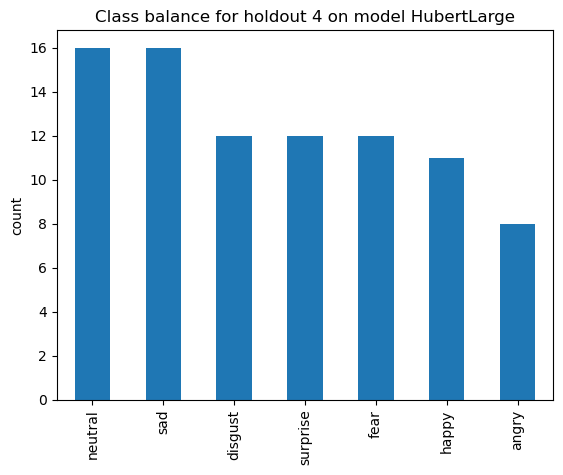

In [306]:
import matplotlib.pyplot as plt

file[file['session']== holdout]['emotion'].value_counts().plot(kind='bar')


os.makedirs(f'images/Session balances/{model_name}/', exist_ok = True) 
plt.title(f'Class balance for holdout {holdout} on model {model_name}')
plt.ylabel('count')
plt.savefig(f'images/Session balances/{model_name}/{model_name}_holdout{holdout}.jpg')
plt.show()

In [307]:
class MyDataSet(torch.utils.data.Dataset):
    def __init__(self, datas, labels, label_transform):
        super(MyDataSet).__init__()
        self.datas = datas
        self.labels = labels
        self.label_transform = label_transform
        
    def __getitem__(self, idx):
        audio = self.datas[idx]
        label = self.label_transform[self.labels[idx]]
        length = audio.size(1)
        return audio, length, label
    
    def __len__(self):
        return len(self.labels)

In [308]:
def collate_indic(data):
    audios, lengths, labels = zip(*data)
    max_len = max(lengths)
    n_ftrs = audios[0].size(2)
    n_dims = audios[0].size(0)
    features = torch.zeros((len(audios), n_dims, max_len, n_ftrs))
    labels = torch.tensor(labels).to(device)
    lengths = torch.tensor(lengths).to(device)

    for i in range(len(data)):
        j, k = audios[i].size(1), audios[i].size(2)
        features[i] = torch.cat([audios[i].to(device), torch.zeros((n_dims, max_len - j, k)).to(device)], dim=1).to(device)

    return features, lengths, labels

In [309]:
categories = ['neutral', 'angry', 'happy', 'sad', 'fear', 'disgust', 'surprise']
cate_dic = {}
for i, cate in enumerate(categories):
    cate_dic[cate] = i
cate_dic

{'neutral': 0,
 'angry': 1,
 'happy': 2,
 'sad': 3,
 'fear': 4,
 'disgust': 5,
 'surprise': 6}

## Train with 3CNN+LSTM

In [310]:
import torch.nn as nn
import torch.nn.functional as F

class ICASSP3CNN(nn.Module):
    def __init__(self, vocab_size, dims = 12, embed_size=128, hidden_size=512, num_lstm_layers = 2, bidirectional = False, label_size=7):
        super().__init__()
        self.n_layers = num_lstm_layers 
        self.hidden = hidden_size
        self.bidirectional = bidirectional
        
        self.aggr = nn.Conv1d(in_channels=dims, out_channels=1, kernel_size=1)
        
        self.embed = nn.Linear(in_features = vocab_size, out_features = embed_size)

        self.cnn  = nn.Conv1d(embed_size, embed_size, kernel_size=3, padding=1)
        self.cnn2 = nn.Conv1d(embed_size, embed_size, kernel_size=5, padding=2)
        self.cnn3 = nn.Conv1d(embed_size, embed_size, kernel_size=7, padding=3)

        self.batchnorm = nn.BatchNorm1d(3 * embed_size)

        self.lstm = nn.LSTM(input_size = 3 * embed_size, 
                            hidden_size = hidden_size, 
                            num_layers = num_lstm_layers, 
                            bidirectional = bidirectional)

        self.linear = nn.Linear(in_features = 2 * hidden_size if bidirectional else hidden_size, 
                                out_features = label_size)


    def forward(self, x, lengths):
        """
        padded_x: (B,T) padded LongTensor
        """
        n, d, b, t = x.size(0), x.size(1), x.size(2), x.size(3)
        x = torch.flatten(x, start_dim=2)
        input = self.aggr(x)
        input = torch.reshape(input, (n, b, t))
        input = self.embed(input)

        batch_size = input.size(0)
        input = input.transpose(1,2)    # (B,T,H) -> (B,H,T)

        cnn_output = torch.cat([self.cnn(input), self.cnn2(input), self.cnn3(input)], dim=1)

        input = F.relu(self.batchnorm(cnn_output))

        input = input.transpose(1,2)

        pack_tensor = nn.utils.rnn.pack_padded_sequence(input, lengths, batch_first=True, enforce_sorted=False)
        _, (hn, cn) = self.lstm(pack_tensor)

        if self.bidirectional:
            h_n = hn.view(self.n_layers, 2, batch_size, self.hidden)
            h_n = torch.cat([ h_n[-1, 0,:], h_n[-1,1,:] ], dim = 1)
        else:
            h_n = hn[-1]

        logits = self.linear(h_n)

        return logits

### Model Traning on each layer 

In [311]:
from tqdm import tqdm
from torch.utils.data import DataLoader

traindata = []
for _, row in tqdm(train.iterrows()):
    traindata.append(torch.load(row['feat_path']).to(device))

417it [00:04, 90.39it/s]


In [312]:
train_dataset = MyDataSet(traindata, train['emotion'].tolist(), cate_dic)
trainloader_args = dict(batch_size=16, shuffle=True)
train_dataloader = DataLoader(train_dataset, **trainloader_args, 
                              collate_fn=collate_indic)

In [313]:
from tqdm import tqdm
from torchsummary import summary
import torch.optim as optim

model = ICASSP3CNN(1024, dims = 24)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00005)

In [314]:
epochs = 50
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

for epoch in tqdm(range(epochs)):
    train_loss = 0
    acc_cnt = 0
    err_cnt = 0
    batch_cnt = 0
    model.train()
    for batch, (x, length, y) in enumerate(train_dataloader):
        x = x.to(device)
        y = y.to(device)
        length = length.cpu()
        optimizer.zero_grad()
        logits = model(x, length)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()
        train_loss += loss.cpu().item()

        #model outputs
        out_val, out_indices = torch.max(logits, dim=1)
        tar_indices = y

        for i in range(len(out_indices)):
            if out_indices[i] == tar_indices[i]:
                acc_cnt += 1
            else:
                err_cnt += 1
        batch_cnt += 1
    
    train_loss = train_loss/batch_cnt
    train_accuracy = acc_cnt/(acc_cnt+err_cnt)
    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss)
    
    print(f"epoch:{epoch+1}, train accu:{train_accuracy:.4f},", f"train loss:{train_loss:.2f}")

  2%|▏         | 1/50 [00:09<07:37,  9.33s/it]

epoch:1, train accu:0.1631, train loss:1.94


  4%|▍         | 2/50 [00:18<07:36,  9.51s/it]

epoch:2, train accu:0.3501, train loss:1.86


  6%|▌         | 3/50 [00:28<07:25,  9.47s/it]

epoch:3, train accu:0.3909, train loss:1.62


  8%|▊         | 4/50 [00:37<07:14,  9.44s/it]

epoch:4, train accu:0.5875, train loss:1.26


 10%|█         | 5/50 [00:46<07:01,  9.36s/it]

epoch:5, train accu:0.6547, train loss:1.09


 12%|█▏        | 6/50 [00:56<06:49,  9.31s/it]

epoch:6, train accu:0.6906, train loss:0.84


 14%|█▍        | 7/50 [01:05<06:38,  9.26s/it]

epoch:7, train accu:0.7482, train loss:0.75


 16%|█▌        | 8/50 [01:14<06:29,  9.28s/it]

epoch:8, train accu:0.7914, train loss:0.58


 18%|█▊        | 9/50 [01:24<06:22,  9.32s/it]

epoch:9, train accu:0.8153, train loss:0.55


 20%|██        | 10/50 [01:33<06:13,  9.33s/it]

epoch:10, train accu:0.7722, train loss:0.76


 22%|██▏       | 11/50 [01:42<06:00,  9.25s/it]

epoch:11, train accu:0.7674, train loss:0.68


 24%|██▍       | 12/50 [01:51<05:53,  9.29s/it]

epoch:12, train accu:0.8657, train loss:0.51


 26%|██▌       | 13/50 [02:01<05:43,  9.27s/it]

epoch:13, train accu:0.8225, train loss:0.50


 28%|██▊       | 14/50 [02:10<05:33,  9.27s/it]

epoch:14, train accu:0.8825, train loss:0.33


 30%|███       | 15/50 [02:20<05:29,  9.43s/it]

epoch:15, train accu:0.9209, train loss:0.33


 32%|███▏      | 16/50 [02:29<05:17,  9.33s/it]

epoch:16, train accu:0.8225, train loss:0.53


 34%|███▍      | 17/50 [02:38<05:06,  9.28s/it]

epoch:17, train accu:0.8945, train loss:0.33


 36%|███▌      | 18/50 [02:47<04:56,  9.25s/it]

epoch:18, train accu:0.8153, train loss:0.47


 38%|███▊      | 19/50 [02:57<04:48,  9.29s/it]

epoch:19, train accu:0.9209, train loss:0.24


 40%|████      | 20/50 [03:06<04:39,  9.31s/it]

epoch:20, train accu:0.9568, train loss:0.16


 42%|████▏     | 21/50 [03:16<04:35,  9.50s/it]

epoch:21, train accu:0.9640, train loss:0.23


 44%|████▍     | 22/50 [03:25<04:22,  9.38s/it]

epoch:22, train accu:0.8225, train loss:0.46


 46%|████▌     | 23/50 [03:34<04:11,  9.33s/it]

epoch:23, train accu:0.9113, train loss:0.28


 48%|████▊     | 24/50 [03:43<04:01,  9.28s/it]

epoch:24, train accu:0.9616, train loss:0.15


 50%|█████     | 25/50 [03:52<03:51,  9.25s/it]

epoch:25, train accu:0.9305, train loss:0.21


 52%|█████▏    | 26/50 [04:02<03:41,  9.25s/it]

epoch:26, train accu:0.9544, train loss:0.18


 54%|█████▍    | 27/50 [04:11<03:32,  9.25s/it]

epoch:27, train accu:0.7842, train loss:0.76


 56%|█████▌    | 28/50 [04:21<03:27,  9.43s/it]

epoch:28, train accu:0.7098, train loss:0.90


 58%|█████▊    | 29/50 [04:30<03:17,  9.40s/it]

epoch:29, train accu:0.8777, train loss:0.41


 60%|██████    | 30/50 [04:40<03:07,  9.39s/it]

epoch:30, train accu:0.9065, train loss:0.33


 62%|██████▏   | 31/50 [04:49<02:58,  9.37s/it]

epoch:31, train accu:0.8513, train loss:0.43


 64%|██████▍   | 32/50 [04:58<02:48,  9.34s/it]

epoch:32, train accu:0.9448, train loss:0.17


 66%|██████▌   | 33/50 [05:07<02:37,  9.29s/it]

epoch:33, train accu:0.9784, train loss:0.10


 68%|██████▊   | 34/50 [05:17<02:31,  9.46s/it]

epoch:34, train accu:0.9904, train loss:0.08


 70%|███████   | 35/50 [05:26<02:20,  9.39s/it]

epoch:35, train accu:0.8849, train loss:0.52


 72%|███████▏  | 36/50 [05:36<02:10,  9.32s/it]

epoch:36, train accu:0.9281, train loss:0.19


 74%|███████▍  | 37/50 [05:45<02:00,  9.27s/it]

epoch:37, train accu:0.9736, train loss:0.09


 76%|███████▌  | 38/50 [05:54<01:51,  9.31s/it]

epoch:38, train accu:0.9832, train loss:0.07


 78%|███████▊  | 39/50 [06:03<01:42,  9.30s/it]

epoch:39, train accu:0.9928, train loss:0.06


 80%|████████  | 40/50 [06:13<01:33,  9.32s/it]

epoch:40, train accu:0.9257, train loss:0.22


 82%|████████▏ | 41/50 [06:23<01:25,  9.49s/it]

epoch:41, train accu:0.9736, train loss:0.09


 84%|████████▍ | 42/50 [06:32<01:15,  9.40s/it]

epoch:42, train accu:0.9904, train loss:0.05


 86%|████████▌ | 43/50 [06:41<01:05,  9.37s/it]

epoch:43, train accu:0.9976, train loss:0.06


 88%|████████▊ | 44/50 [06:50<00:55,  9.32s/it]

epoch:44, train accu:0.8225, train loss:0.68


 90%|█████████ | 45/50 [07:00<00:46,  9.29s/it]

epoch:45, train accu:0.9664, train loss:0.12


 92%|█████████▏| 46/50 [07:09<00:37,  9.28s/it]

epoch:46, train accu:0.9952, train loss:0.05


 94%|█████████▍| 47/50 [07:18<00:28,  9.40s/it]

epoch:47, train accu:0.9952, train loss:0.03


 96%|█████████▌| 48/50 [07:28<00:18,  9.38s/it]

epoch:48, train accu:1.0000, train loss:0.02


 98%|█████████▊| 49/50 [07:37<00:09,  9.34s/it]

epoch:49, train accu:1.0000, train loss:0.02


100%|██████████| 50/50 [07:46<00:00,  9.34s/it]

epoch:50, train accu:1.0000, train loss:0.01


## Model Test

In [315]:
#Let's free memory, else we will overflow our 16GB Memory GPU
del traindata
del train_dataset
del trainloader_args
del train_dataloader

torch.cuda.empty_cache()

In [316]:
from tqdm import tqdm

testdata = []
for _, row in tqdm(test.iterrows()):
    testdata.append(torch.load(row['feat_path']).to(device))
    
test_dataset = MyDataSet(testdata, test['emotion'].tolist(), cate_dic)
testloader_args = dict(batch_size=1, shuffle=True)
test_dataloader = DataLoader(test_dataset, **testloader_args, 
                             collate_fn=collate_indic)

87it [00:00, 93.65it/s]


In [317]:
test_loss = 0
acc_cnt = 0
err_cnt = 0
batch_cnt = 0
model.eval()

for x, lengths, y in test_dataloader:

    x = x.to(device)
    y = y.to(device)

    lengths = lengths.cpu()
    logits = model(x, lengths)
    loss = criterion(logits, y)
    test_loss += loss.cpu().item()

    out_val, out_indices = torch.max(logits, dim=1)
    tar_indices = y

    for i in range(len(out_indices)):
        if out_indices[i] == tar_indices[i]:
            acc_cnt += 1
        else:
            err_cnt += 1
    batch_cnt += 1

test_loss = test_loss/batch_cnt
test_accuracy = acc_cnt/(acc_cnt+err_cnt)
print(f'test accuracy: {test_accuracy}')

test accuracy: 0.8160919540229885


Got 71 / 87 with accuracy 81.61
Confusion matrix for Wav2Vec 2.0:


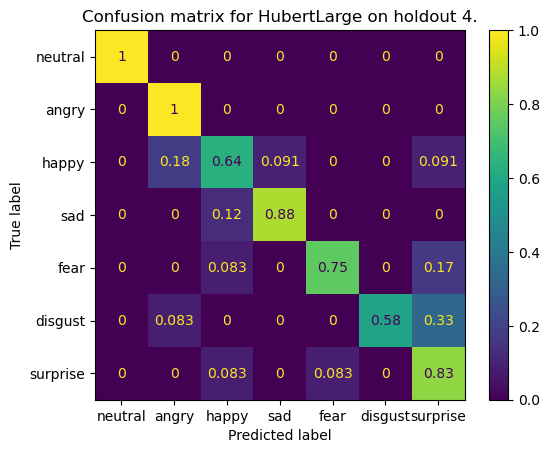

In [318]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
    y_preds_list = []
    y_list = []
    
    with torch.no_grad():
        for batch, (x, length, y) in enumerate(loader):
            x = x.to(device=device)
            y = y.to(device=device)
            y_list.extend(y.tolist())
            length = length.to('cpu')
            
            scores = model(x, length)
            _, predictions = scores.max(1)
            y_preds_list.extend(predictions.tolist())
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
        
        print(f'Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}') 
    
    model.train()
    return y_preds_list, y_list, round(float(num_correct)/float(num_samples)*100, 1)
    
y_preds_list, y_list, accur = check_accuracy(test_dataloader, model)

print(f'Confusion matrix for Wav2Vec 2.0:')
disp = ConfusionMatrixDisplay(confusion_matrix(y_list, y_preds_list, normalize='true'), display_labels=['neutral', 'angry', 'happy', 'sad', 'fear', 'disgust', 'surprise'])

disp.plot()
plt.title(f'Confusion matrix for {model_name} on holdout {holdout}.')


os.makedirs(f'images/Confusion Matrices/{model_name}/', exist_ok = True) 

plt.savefig(f'images/Confusion Matrices/{model_name}/{model_name}_CM_holdout{holdout}.png')
plt.show()

In [319]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

aggr.weight tensor([[[-0.1077],
         [-0.0328],
         [-0.0412],
         [ 0.0241],
         [ 0.1026],
         [ 0.0479],
         [-0.0798],
         [ 0.0346],
         [ 0.1955],
         [ 0.1046],
         [ 0.0906],
         [ 0.2042],
         [ 0.0270],
         [ 0.1290],
         [ 0.0521],
         [-0.0121],
         [-0.1904],
         [-0.0378],
         [-0.1793],
         [ 0.1849],
         [-0.1922],
         [ 0.1563],
         [-0.0885],
         [ 0.0227]]], device='cuda:0')
aggr.bias tensor([0.1706], device='cuda:0')
embed.weight tensor([[-0.0009,  0.0023,  0.0121,  ..., -0.0006, -0.0116,  0.0169],
        [-0.0281,  0.0257,  0.0202,  ..., -0.0270, -0.0169, -0.0220],
        [-0.0159, -0.0300, -0.0093,  ...,  0.0216,  0.0154, -0.0310],
        ...,
        [-0.0010,  0.0011,  0.0076,  ...,  0.0051,  0.0009, -0.0214],
        [-0.0089,  0.0254,  0.0011,  ..., -0.0270, -0.0018,  0.0078],
        [ 0.0279, -0.0072,  0.0134,  ...,  0.0005,  0.0016,  0.0170]]

In [320]:
model_path = f'models/{model_folder}/'

os.makedirs(model_path, exist_ok = True) 


torch.save({'epoch':epochs,
            'model_state_dict':model.state_dict(),
            'optimizer_state_dict':optimizer.state_dict()},
            model_path + f'holdout{holdout}.pth')

In [321]:
#Let's free memory, else we will overflow our 16GB Memory GPU
del testdata
del test_dataset
del testloader_args
del test_dataloader

torch.cuda.empty_cache()